## 1.设定问题
要解决的问题：我想要通过花的特征来预测花的类别  => 分类问题  => 监督学习问题 => 特征X 和 标注的目标y
                                         => 选择分类算法 => 构造分类器

## 2. 准备数据

### 本课程获取数据的方法：
1. 使用sklearn自带的数据集
2. 导入数据文件构造数据集

#### 1. sklearn自带数据集
#### sklearn.datasets 子模块
1. load_xxx: 导入小数据集，sklearn自带的数据文件
2. fetch_xxx: 导入大数据集，需要运行时通过网络下载
3. make_xxx: 创建数据集（根据规则创建指定分布的数据集，高斯分布，泊松分布，环形分布，线性分布。。。）

In [46]:
from sklearn.datasets import load_iris   # 加载iris数据集的方法
iris = load_iris()  # 导入iris数据集的字典
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- .data  => 特征数据 X [花萼长，花萼宽，花瓣长，花瓣宽 ] 
- .target => 目标数据 y 种类 [0,1,2]
- .target_names => 目标数据名称 种类的名称 [setosa,versicolor,virginica]
- .feature_names => 特征数据列名称 [花萼长，花萼宽，花瓣长，花瓣宽 ] 
- .filename => 数据文件的路径
- .DESCR => 数据集介绍

In [47]:
iris.data[:5]  # 二维数组 numpy.ndarray

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [48]:
iris.feature_names # data的4列分别代表什么意思

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
iris.target  # 一维数组 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
iris.target_names  # target中0,1,2分别代表什么意思

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
iris.target_names[iris.target[77]]  # 第77个样本是什么花？

'versicolor'

In [52]:
iris.filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
X = iris.data
y = iris.target

In [12]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
y[:5]

array([0, 0, 0, 0, 0])

In [14]:
print(f"特征X的形状：{X.shape}")  # 150行4列，150个样本，每个样本有4个特征
print(f"特征y的形状：{y.shape}")  # 150个目标值

特征X的形状：(150, 4)
特征y的形状：(150,)


#### 2. 导入数据文件构造数据集
pandas.read_xxx

In [9]:
import pandas as pd
df_iris = pd.read_csv("iris_clean.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,4.9,3.0,1.4,0.2,0,11.545353
1,4.7,3.2,1.4,0.2,0,11.812388
2,4.6,3.1,1.5,0.2,0,11.199778
3,5.0,3.6,1.4,0.2,0,14.137167
4,5.4,3.9,1.7,0.4,0,16.540485


In [20]:
# X特征是可以选择的，特征也是可以构造的，本例中，我们选择除了目标以外的所有值当做特征
y = df_iris.species.values
X = df_iris.iloc[:,[0,1,2,3,5]].values
print(f"特征X的形状：{X.shape}")  # 150行4列，150个样本，每个样本有4个特征
print(f"特征y的形状：{y.shape}")  # 150个目标值

特征X的形状：(150, 5)
特征y的形状：(150,)


In [21]:
# 还有一种写法
y = df_iris.pop("species").values # pop 弹出：取出一列值，并且在原dataframe中删除
X = df_iris.values  # 弹出species之后剩下的都用作特征
print(f"特征X的形状：{X.shape}")  # 150行4列，150个样本，每个样本有4个特征
print(f"特征y的形状：{y.shape}")  # 150个目标值

特征X的形状：(150, 5)
特征y的形状：(150,)


## 3. 划分数据集（训练、测试）

In [55]:
from sklearn.model_selection import train_test_split # 划分训练测试集，默认随机打散取样划分

X_train,X_test,y_train,y_test = train_test_split(X,y)  # 特征和目标都要划分训练、测试集  

print(f"训练特征X_train的形状：{X_train.shape}")
print(f"训练目标y_train的形状：{y_train.shape}")
print(f"测试特征X_test的形状：{X_test.shape}")
print(f"测试目标y_test的形状：{y_test.shape}")

训练特征X_train的形状：(112, 4)
训练目标y_train的形状：(112,)
测试特征X_test的形状：(38, 4)
测试目标y_test的形状：(38,)


## 4. 选择算法构造模型

- 算法选择的依据
1. 根据问题来选择 分类 ？ 回归
2. 根据数据分布来选择

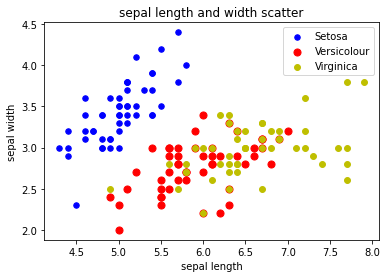

In [25]:
from matplotlib import pyplot
from sklearn.datasets import load_iris

iris = load_iris()
setosa_sepal_len = iris.data[:50, 0]
setosa_sepal_width = iris.data[:50, 1]

versi_sepal_len = iris.data[50:100, 0]
versi_sepal_width = iris.data[50:100, 1]

vergi_sepal_len = iris.data[100:, 0]
vergi_sepal_width = iris.data[100:, 1]

pyplot.scatter(setosa_sepal_len, setosa_sepal_width, marker = 'o', c = 'b',  s = 30, label = 'Setosa')
pyplot.scatter(versi_sepal_len, versi_sepal_width, marker = 'o', c = 'r',  s = 50, label = 'Versicolour')
pyplot.scatter(vergi_sepal_len, vergi_sepal_width, marker = 'o', c = 'y',  s = 35, label = 'Virginica')
pyplot.xlabel("sepal length")
pyplot.ylabel("sepal width")
pyplot.title("sepal length and width scatter")
pyplot.legend(loc = "upper right")


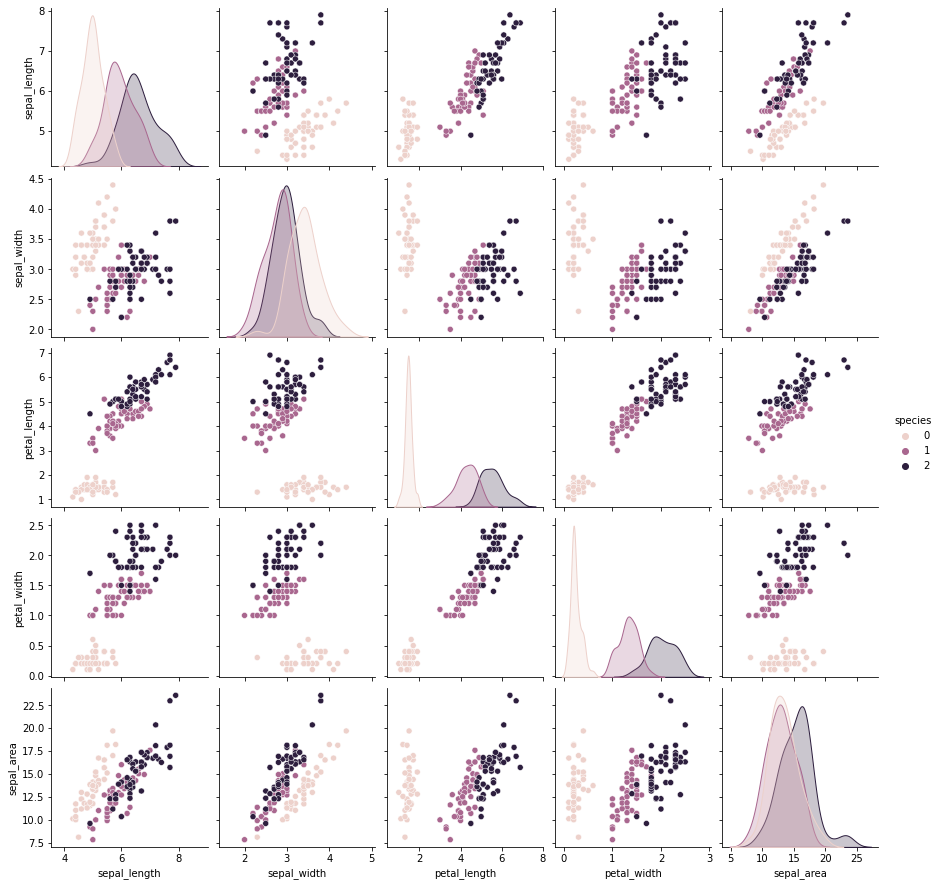

In [29]:
import seaborn as sns
df_iris = pd.read_csv("iris_clean.csv")
sns.pairplot(df_iris,hue='species')

- sklearn提供的算法选择路径
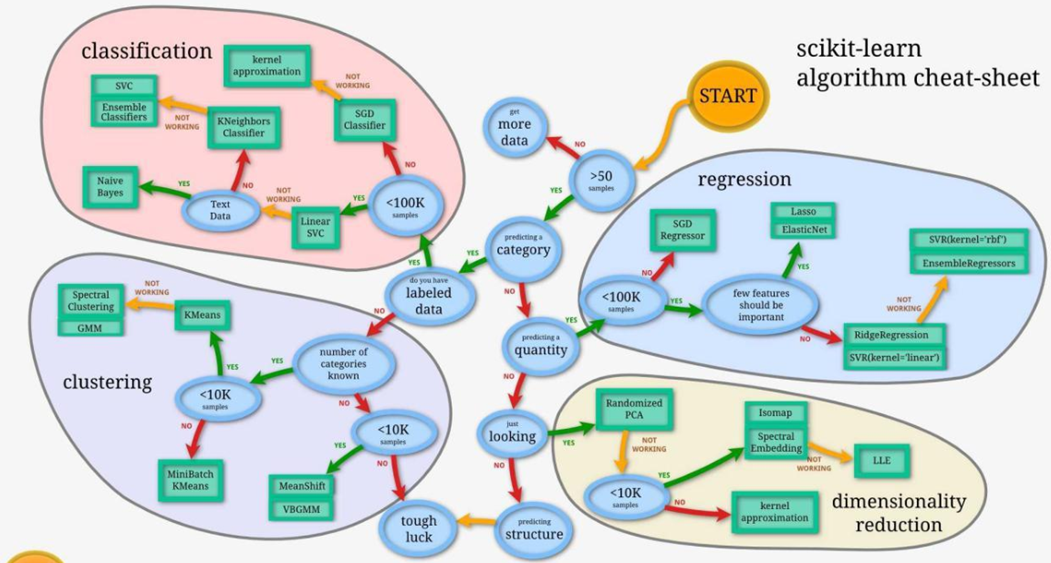

#### 从sklearn中选择合适的算法模型构造器，调整超参数

In [59]:
# 分类问题
from sklearn.svm import SVC # 给予支持向量的分类器
from sklearn.neighbors import KNeighborsClassifier # 基于分布距离的KNN分类器
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # 朴素贝叶斯分类器
from sklearn.linear_model import SGDClassifier,LogisticRegression # 基于线性回归的分类器
from sklearn.tree import DecisionTreeClassifier  # 基于决策树的分类器

classifier = KNeighborsClassifier(n_neighbors=3) # 使用KNN构造分类器模型
# classifier = SVC()

## 5. 使用训练集数据(X_train,y_train)训练模型

In [60]:
classifier.fit(X_train,y_train)  # 得到一个训练好的模型

KNeighborsClassifier(n_neighbors=3)

## 6. 评估一下模型的训练和测试效果

In [61]:
# 最简单的方法
train_score = classifier.score(X_train,y_train)  # 模型在训练集上的表现，原题考试
test_score = classifier.score(X_test,y_test)     # 模型在测试集上的表现，这个对实际应用更有参考性
print(f"KNN在训练集上的得分：{train_score}")
print(f"KNN在测试集上的得分：{test_score}")

KNN在训练集上的得分：0.9553571428571429
KNN在测试集上的得分：0.9736842105263158


In [73]:
X

array([[ 4.9       ,  1.4       ,  0.2       ,  0.        , 11.545353  ],
       [ 4.7       ,  1.4       ,  0.2       ,  0.        , 11.81238838],
       [ 4.6       ,  1.5       ,  0.2       ,  0.        , 11.19977781],
       [ 5.        ,  1.4       ,  0.2       ,  0.        , 14.13716694],
       [ 5.4       ,  1.7       ,  0.4       ,  0.        , 16.54048532],
       [ 4.6       ,  1.4       ,  0.3       ,  0.        , 12.28362728],
       [ 5.        ,  1.5       ,  0.2       ,  0.        , 13.35176878],
       [ 4.4       ,  1.4       ,  0.2       ,  0.        , 11.74955652],
       [ 4.9       ,  1.5       ,  0.1       ,  0.        , 11.9301981 ],
       [ 5.4       ,  1.5       ,  0.2       ,  0.        , 15.6922553 ],
       [ 4.8       ,  1.6       ,  0.2       ,  0.        , 12.81769803],
       [ 4.8       ,  1.4       ,  0.1       ,  0.        , 11.30973355],
       [ 4.3       ,  1.1       ,  0.1       ,  0.        , 10.13163631],
       [ 5.8       ,  1.2       ,  0.2

## 换一个问题：我要根据花朵的种类和一些特征，预测花萼宽sepal_width
- sepal_width 连续数值 =》 回归问题 

In [67]:
# 导入数据
df_iris = pd.read_csv("iris_clean.csv")

# 划分X,Y 
y = df_iris.pop("sepal_width").values #  目标是sepal_width 一个连续数值字段
X = df_iris.values

# 划分训练集 测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 train_size=0.8, # 训练集占80%，剩下的20%就是测试集
                                                 random_state=100) # 随机种子，用来固定随机分布



In [70]:
# 构造回归模型
from sklearn.svm import SVR # 基于支持向量的回归器
from sklearn.neighbors import KNeighborsRegressor # 基于KNN的回归器
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge # 基于线性回归的回归器
from sklearn.tree import DecisionTreeRegressor # 基于决策树的回归器

rgr = KNeighborsRegressor() # 使用KNN算法构造回归模型
rgr = LinearRegression() # 线性回归

# 训练模型
rgr.fit(X_train,y_train)

# 评估模型
train_score = rgr.score(X_train,y_train)  # 模型在训练集上的表现，原题考试
test_score = rgr.score(X_test,y_test)     # 模型在测试集上的表现，这个对实际应用更有参考性
print(f"KNN在训练集上的得分：{train_score}")
print(f"KNN在测试集上的得分：{test_score}")

KNN在训练集上的得分：0.9879598662801712
KNN在测试集上的得分：0.9744316346754487


## 7.应用

In [72]:
一朵不知道是什么类型的花 = [4.9, 3.1, 1.6, 0.3]
y_pred = classifier.predict([一朵不知道是什么类型的花])
print(f"这是一朵{iris.target_names[y_pred[0]]}花")

这是一朵setosa花


In [74]:
一朵不知道花萼多宽的花 = [ 5.1,  1.6  ,  0.3  ,  0., 14.13716694]
y_pred = rgr.predict([一朵不知道花萼多宽的花])
print(f"这朵花的花萼宽{y_pred[0]}cm")

这朵花的花萼宽3.502768898191618cm
